In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

sns.set(font_scale=1.5);


In [2]:
%matplotlib inline

In [3]:
# upload data 
file = 'C:/Users/ejohnso/Documents/Data Work/Python Project GA/AllSALsJanJun2018_USDTA_MatchedList_ej.csv'
SAL_data = pd.read_csv(file) 

In [4]:
# view columns 
SAL_data.columns

Index(['Contact/Lead ID', 'Contact/Lead Status', 'ID', 'Firm Type',
       'Role Type', 'Contact/Lead Company Name', 'Product', 'Opportunity ID',
       'Opportunity Sales Stage', 'Opportunity Lost Reason',
       'Opportunity Owner', 'count', 'Rep CRD', 'Suffix', 'Title',
       'TitleCategories', 'RIAFirmCRD', 'Office_City',
       'Office_MetropolitanArea', 'Office_State', 'Office_ZipCode',
       'Office_ZipCode4', 'Office_AddressType', 'TotalAssetsInMillions',
       'DuallyRegisteredBDRIARep', 'NumberFirmAssociations', 'Licenses',
       'BDNameCurrent', 'BreakawayRep', 'RegistrationDate_Full', 'Custodian1',
       'Custodian2', 'Custodian3', 'Custodian4', 'Custodian5', 'TotalAccounts',
       'AverageAccountSize', 'Number_PlanningClients',
       'Number_InvestmentAdvisoryClients', 'Number_IAReps', 'Number_BDReps',
       'Number_InsuranceLicensedReps', 'Number_Employees',
       'FeeStructure_AssetBasedFee', 'FeeStructure_AssetBasedFeeOnly',
       'FeeStructure_HourlyOrFixedFe

In [5]:
SAL_data.head(10)

,Contact/Lead ID,Contact/Lead Status,ID,Firm Type,Role Type,Contact/Lead Company Name,Product,Opportunity ID,Opportunity Sales Stage,Opportunity Lost Reason,...,Investments_PrivateEquityFunds,Investments_PrivatePlacements,Investments_RealEstatePartnerships,Investments_REITs,Investments_UITs,Investments_USGovernmentSecurities,Investments_VariableAnnuities,Investments_VariableLife,Investments_VentureCapitalFunds,Investments_Warrants
0,0030V00003gQkqcQAC,Converted,1,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,"Moore & Shirley Financial Planning, LLC",NaN,NaN,NaN,NaN,...,Yes,NaN,NaN,Yes,Yes,Yes,Yes,NaN,NaN,NaN
1,00Q0V00000xsDOBUA2,Could not contact,2,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,"Reunite Financial, LLC.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0030V00003dmoOXQAY,Could Not Contact,3,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,North Woods Capital Benefits LLC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
3,0030V00003dmT71QAE,Converted,4,Registered Investment Advisory Firm (RIA),Portfolio Management,Executive Planning LLC,Morningstar Office Cloud,OPP536082,6 - Closed Lost,Dropped Project: Budget cut,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN
4,00Q0V00000xsAXOUA2,Renurture,5,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,Gloria Fang CPA PLLC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN
5,00Q0V00000xsAXFUA2,Outreach,6,Asset Management Firm,Investment Advisory,"Brokerage Specialists, Inc.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN
6,00Q0V00000xrSfIUAU,Renurture,7,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,"RevolverCap Management, L.P.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,00Q0V00000zHhpEUAS,Could not contact,8,Asset Management Firm,Registered Investment Advisor/Financial Planner,My Financial Coach,NaN,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN
8,0030V00003dka2TQAQ,Converted,9,Asset Management Firm,Investment Advisory,"Koon Financial Planning & Consulting, LLC",Office Cloud - License,OPP528193,6 - Closed Lost,Competitor Won: We lack key capability,...,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
9,00Q0V00000x78xVUAQ,Renurture,10,Asset Management Firm,Investment Advisory,OLD PEAK FINANCE LLC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN


In [6]:
SAL_data.shape

(3308, 78)

In [7]:
SAL_data.dtypes

Contact/Lead ID                                 object
Contact/Lead Status                             object
ID                                               int64
Firm Type                                       object
Role Type                                       object
Contact/Lead Company Name                       object
Product                                         object
Opportunity ID                                  object
Opportunity Sales Stage                         object
Opportunity Lost Reason                         object
Opportunity Owner                               object
count                                           object
Rep CRD                                        float64
Suffix                                          object
Title                                           object
TitleCategories                                 object
RIAFirmCRD                                     float64
Office_City                                     object
Office_Met

In [7]:
SAL_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 78 columns):
Contact/Lead ID                                3308 non-null object
Contact/Lead Status                            3308 non-null object
ID                                             3308 non-null int64
Firm Type                                      2847 non-null object
Role Type                                      2811 non-null object
Contact/Lead Company Name                      3302 non-null object
Product                                        206 non-null object
Opportunity ID                                 206 non-null object
Opportunity Sales Stage                        206 non-null object
Opportunity Lost Reason                        38 non-null object
Opportunity Owner                              206 non-null object
count                                          3308 non-null object
Rep CRD                                        1296 non-null float64
Suffix         

In [8]:
# check value counts for conversion variables 
SAL_data.loc[:, 'Contact/Lead Status'].value_counts()

Renurture            1346
Could not contact     834
Outreach              526
Converted             399
Purchased AWS         102
Could Not Contact     100
Total                   1
Name: Contact/Lead Status, dtype: int64

In [9]:
# clean up outcome variable 
# combine conversion measures (converted and purchased aws) to one variable 
SAL_data['Contact/Lead Status'] = SAL_data['Contact/Lead Status'].replace(['Purchased AWS'],'Converted')

In [10]:
# confirm change
SAL_data.loc[:, 'Contact/Lead Status'].value_counts()

Renurture            1346
Could not contact     834
Outreach              526
Converted             501
Could Not Contact     100
Total                   1
Name: Contact/Lead Status, dtype: int64

In [11]:
# code outcome variable as 1 and 0
SAL_data['Conversion'] = np.where(SAL_data['Contact/Lead Status']=='Converted', 1, 0)
SAL_data.head(10)

,Contact/Lead ID,Contact/Lead Status,ID,Firm Type,Role Type,Contact/Lead Company Name,Product,Opportunity ID,Opportunity Sales Stage,Opportunity Lost Reason,...,Investments_PrivatePlacements,Investments_RealEstatePartnerships,Investments_REITs,Investments_UITs,Investments_USGovernmentSecurities,Investments_VariableAnnuities,Investments_VariableLife,Investments_VentureCapitalFunds,Investments_Warrants,Conversion
0,0030V00003gQkqcQAC,Converted,1,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,"Moore & Shirley Financial Planning, LLC",NaN,NaN,NaN,NaN,...,NaN,NaN,Yes,Yes,Yes,Yes,NaN,NaN,NaN,1
1,00Q0V00000xsDOBUA2,Could not contact,2,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,"Reunite Financial, LLC.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0030V00003dmoOXQAY,Could Not Contact,3,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,North Woods Capital Benefits LLC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,0
3,0030V00003dmT71QAE,Converted,4,Registered Investment Advisory Firm (RIA),Portfolio Management,Executive Planning LLC,Morningstar Office Cloud,OPP536082,6 - Closed Lost,Dropped Project: Budget cut,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,1
4,00Q0V00000xsAXOUA2,Renurture,5,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,Gloria Fang CPA PLLC,NaN,NaN,NaN,NaN,...,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,0
5,00Q0V00000xsAXFUA2,Outreach,6,Asset Management Firm,Investment Advisory,"Brokerage Specialists, Inc.",NaN,NaN,NaN,NaN,...,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,0
6,00Q0V00000xrSfIUAU,Renurture,7,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,"RevolverCap Management, L.P.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,00Q0V00000zHhpEUAS,Could not contact,8,Asset Management Firm,Registered Investment Advisor/Financial Planner,My Financial Coach,NaN,NaN,NaN,NaN,...,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,0
8,0030V00003dka2TQAQ,Converted,9,Asset Management Firm,Investment Advisory,"Koon Financial Planning & Consulting, LLC",Office Cloud - License,OPP528193,6 - Closed Lost,Competitor Won: We lack key capability,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,1
9,00Q0V00000x78xVUAQ,Renurture,10,Asset Management Firm,Investment Advisory,OLD PEAK FINANCE LLC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,0


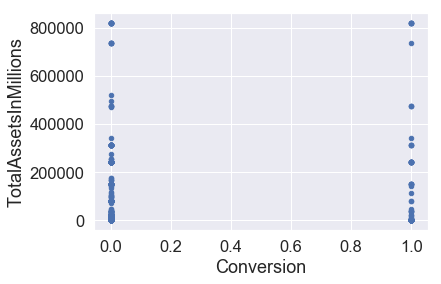

In [12]:
# visualize relationship between target variables 
# Make a scatter plot comparing `conversion` and `total assets`
# /scrub/
ax = SAL_data.plot(kind='scatter', x='Conversion', y='TotalAssetsInMillions')

In [13]:
# remove null values

SAL_data.info()   # Quickly shows number of non-null per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 79 columns):
Contact/Lead ID                                3308 non-null object
Contact/Lead Status                            3308 non-null object
ID                                             3308 non-null int64
Firm Type                                      2847 non-null object
Role Type                                      2811 non-null object
Contact/Lead Company Name                      3302 non-null object
Product                                        206 non-null object
Opportunity ID                                 206 non-null object
Opportunity Sales Stage                        206 non-null object
Opportunity Lost Reason                        38 non-null object
Opportunity Owner                              206 non-null object
count                                          3308 non-null object
Rep CRD                                        1296 non-null float64
Suffix         

In [29]:
SAL_data['TotalAssetsInMillions'].isnull().sum()

2432

In [51]:
SAL_totalassetsviz = SAL_data[['TotalAssetsInMillions', 'ID']].copy()

In [55]:
SAL_totalassetsviz = SAL_totalassetsviz.dropna()

In [57]:
SAL_totalassetsviz['TotalAssetsInMillions'].isnull().sum()

0

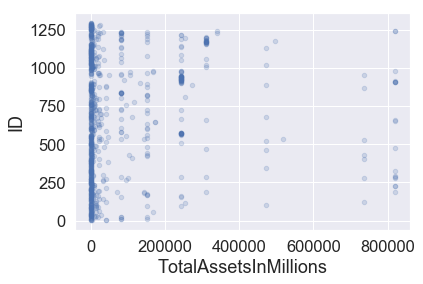

In [56]:
# vizualize distribution 
ax = SAL_totalassetsviz.plot(kind='scatter', x='TotalAssetsInMillions', y='ID', alpha=0.2);

In [31]:
SAL_totalassets = SAL_data[['TotalAssetsInMillions', 'Conversion']].copy()

In [32]:
SAL_totalassets.head()

,TotalAssetsInMillions,Conversion
0,40310.84,1
1,21.07,0
2,40310.84,0
3,3404.64,1
4,23.81,0


In [38]:
SAL_totalassets = SAL_totalassets.dropna()

In [39]:
SAL_totalassets.isnull().sum()

TotalAssetsInMillions    0
Conversion               0
dtype: int64

In [40]:
# Fit a linear regression estimator and store the predictions.
# /scrub/
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['TotalAssetsInMillions']
X = SAL_totalassets[feature_cols] 
y = SAL_totalassets.loc[:, 'Conversion'] 

#y=y[np.logical_not(np.isnan(y))]
#X=X[np.logical_not(np.isnan(X))]

linreg.fit(X, y)
SAL_totalassets['Conversion_pred'] = linreg.predict(X)



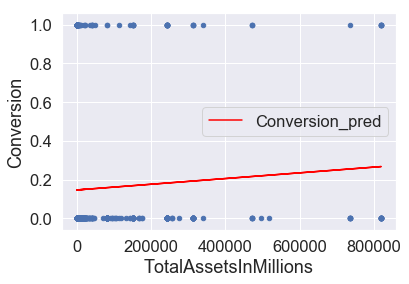

In [41]:
# Scatter plot that includes the regression line
# /scrub/
ax = SAL_totalassets.plot(kind='scatter', x='TotalAssetsInMillions', y='Conversion')
SAL_totalassets.plot(x='TotalAssetsInMillions', y='Conversion_pred', color='red', ax=ax);

In [42]:
# Fit a logistic regression estimator and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['TotalAssetsInMillions']
X = SAL_totalassets.loc[:, feature_cols]
y = SAL_totalassets.loc[:, 'Conversion']

logreg.fit(X,y)
pred = logreg.predict(X)


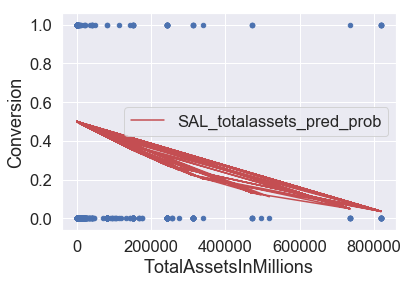

In [58]:
# Logistic regression handles this case much better, because the
# model converges toward 1 instead of flying off to infinity.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['TotalAssetsInMillions']
X = SAL_totalassets.loc[:, feature_cols]
y = SAL_totalassets.loc[:, 'Conversion']

logreg.fit(X,y)
pred = logreg.predict(X)

SAL_totalassets.loc[:, 'SAL_totalassets_pred_prob'] = logreg.predict_proba(X)[:, 1]
ax = SAL_totalassets.plot(kind='scatter', x='TotalAssetsInMillions', y='Conversion')
SAL_totalassets.plot(x='TotalAssetsInMillions', y='SAL_totalassets_pred_prob', c='r', ax=ax);

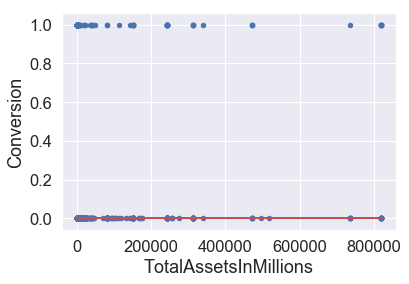

In [60]:
# Scatterplot logistic regression 
ax = SAL_totalassets.plot(kind='scatter', x='TotalAssetsInMillions', y='Conversion')
ax.plot(SAL_totalassets.loc[:, 'TotalAssetsInMillions'], np.array(pred), c='r');

In [61]:
# Examine the predicted probabilities for the first handful of rows of `X`.
logreg.predict_proba(X)[0:10]

array([[0.54017761, 0.45982239],
       [0.50002105, 0.49997895],
       [0.54017761, 0.45982239],
       [0.50340067, 0.49659933],
       [0.50002378, 0.49997622],
       [0.50015185, 0.49984815],
       [0.50015572, 0.49984428],
       [0.64780831, 0.35219169],
       [0.58018182, 0.41981818],
       [0.50002526, 0.49997474]])

In [62]:
# Store the predicted probabilities of class 1.
# /scrub/
SAL_totalassets.loc[:, 'conversion_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [63]:
SAL_totalassets.head(10)

,TotalAssetsInMillions,Conversion,Conversion_pred,conversion_pred_prob,SAL_totalassets_pred_prob
0,40310.84,1,0.152912,0.459822,0.459822
1,21.07,0,0.146979,0.499979,0.499979
2,40310.84,0,0.152912,0.459822,0.459822
3,3404.64,1,0.147477,0.496599,0.496599
4,23.81,0,0.146979,0.499976,0.499976
5,152.03,0,0.146998,0.499848,0.499848
6,155.90,0,0.146999,0.499844,0.499844
7,152530.46,0,0.169437,0.352192,0.352192
8,80973.20,1,0.158900,0.419818,0.419818
9,25.29,0,0.146979,0.499975,0.499975


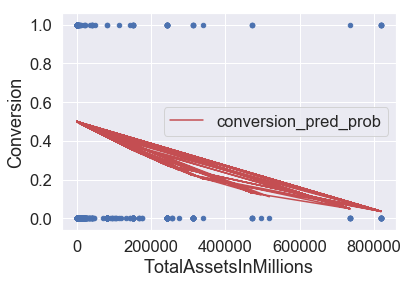

In [64]:
# Plot the predicted probabilities.
ax = SAL_totalassets.plot(kind='scatter', x='TotalAssetsInMillions', y='Conversion')
SAL_totalassets.plot(x='TotalAssetsInMillions', y='conversion_pred_prob', c='r', ax=ax);

In [48]:
# Examine some example predictions.
# /scrub/
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))

[[0.500001 0.499999]]
[[0.500002 0.499998]]
[[0.500003 0.499997]]


In [49]:
# appears there may not be enough data points of conversion; check value counts 
SAL_totalassets.loc[:, 'Conversion'].value_counts()

0    738
1    138
Name: Conversion, dtype: int64

In [65]:
# get test set and score 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = SAL_totalassets.loc[:, ['TotalAssetsInMillions']]
y = SAL_totalassets.loc[:, 'Conversion']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [67]:
LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR.score(X_test, y_test)

0.8493150684931506

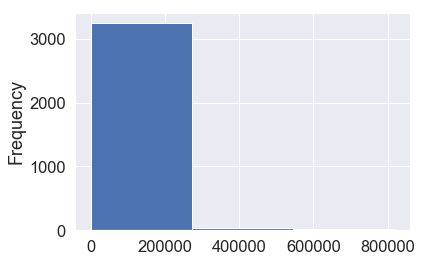

In [38]:
ax = SAL_data.loc[:, 'TotalAssetsInMillions'].plot(kind='hist', bins=3);

In [39]:
# total assets statistics 
SAL_data['TotalAssetsInMillions'].describe()

count      3308.000000
mean      18986.960843
std       86953.180345
min           0.000000
25%           0.000000
50%           0.000000
75%          10.297500
max      819825.500000
Name: TotalAssetsInMillions, dtype: float64

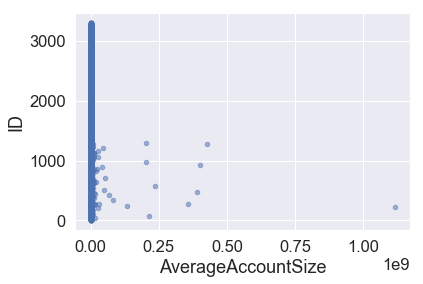

In [40]:
# visualize account size 
ax = SAL_data.plot(kind='scatter', x='AverageAccountSize', y='ID', alpha=0.5);

In [41]:
# account size statistics 
SAL_data['AverageAccountSize'].describe()

count    3.308000e+03
mean     1.504380e+06
std      2.515827e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.848450e+05
max      1.116655e+09
Name: AverageAccountSize, dtype: float64

In [42]:
# look at role types
# get all different kinds of role types
SAL_data.loc[:, 'Role Type'].value_counts().sort_index()

Advisor/Financial Consulting                                 1
Advisor/Financial Planner                                   53
Advisor/Financial Planner/Registered Investment Advisor      4
Asset Management                                             3
Business Development                                         1
Business Development/National Accounts                      76
Compensation                                                 4
Compliance                                                  28
Consulting                                                 112
Due Diligence                                               69
Executive Management                                       241
Finance/Treasury                                            46
Individual Investor                                         19
Individual/Retail/Personal Investing                         2
Insurance                                                   17
Investment Advisory                                    

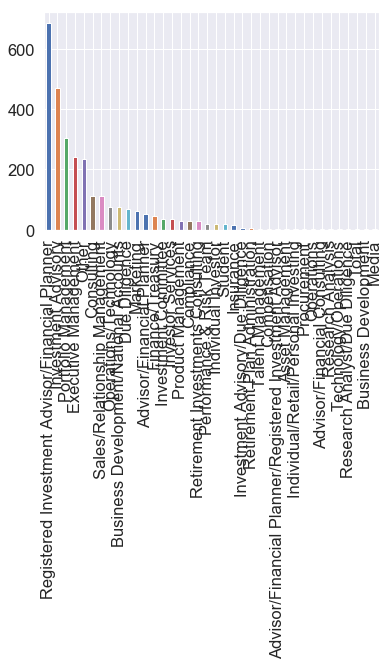

In [43]:
# plot by role type
ax = SAL_data.loc[:, 'Role Type'].value_counts().plot(kind='bar')

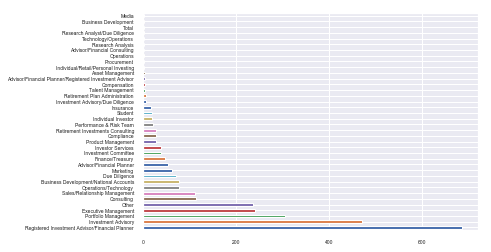

In [46]:
# Plot the same data as a (horizontal) bar plot 
ax = SAL_data.loc[:, 'Role Type'].value_counts().plot(kind='barh',fontsize=5);

In [62]:
SAL_conversions = SAL_data.loc[SAL_data.loc[:, 'Conversion'] == 1, :]

In [63]:
SAL_conversions.shape

(501, 82)

In [64]:
SAL_conversions.head()

,Contact/Lead ID,Contact/Lead Status,ID,Firm Type,Role Type,Contact/Lead Company Name,Product,Opportunity ID,Opportunity Sales Stage,Opportunity Lost Reason,...,Investments_UITs,Investments_USGovernmentSecurities,Investments_VariableAnnuities,Investments_VariableLife,Investments_VentureCapitalFunds,Investments_Warrants,Conversion,Conversion_pred,conversion_pred_prob,conversion_pred_prob2
0,0030V00003gQkqcQAC,Converted,1,Registered Investment Advisory Firm (RIA),Registered Investment Advisor/Financial Planner,"Moore & Shirley Financial Planning, LLC",NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,NaN,NaN,NaN,1,0.151062,0.166831,0.499736
3,0030V00003dmT71QAE,Converted,4,Registered Investment Advisory Firm (RIA),Portfolio Management,Executive Planning LLC,Morningstar Office Cloud,OPP536082,6 - Closed Lost,Dropped Project: Budget cut,...,NaN,NaN,Yes,Yes,NaN,NaN,1,0.150923,0.163286,0.499833
8,0030V00003dka2TQAQ,Converted,9,Asset Management Firm,Investment Advisory,"Koon Financial Planning & Consulting, LLC",Office Cloud - License,OPP528193,6 - Closed Lost,Competitor Won: We lack key capability,...,NaN,Yes,NaN,NaN,NaN,NaN,1,0.150852,0.170809,0.499883
15,0030V00003dlnduQAA,Converted,16,Registered Investment Advisory Firm (RIA),Investment Advisory,"Private Wealth Advisors, Inc.",Direct- License,OPP532023,3 - Securing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0.151405,0.162962,0.499497
17,0030V00003f4ZoqQAE,Converted,18,Asset Management Firm,NaN,Cherry Lane Capital LLC,Direct- License,OPP561770,3 - Securing,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,1,0.150755,0.162962,0.499950


In [66]:
# role types of conversions
SAL_conversions.loc[:, 'Role Type'].value_counts().sort_index()

Advisor/Financial Planner                                    6
Advisor/Financial Planner/Registered Investment Advisor      1
Asset Management                                             1
Business Development/National Accounts                      13
Compliance                                                   6
Consulting                                                  13
Due Diligence                                                9
Executive Management                                        47
Finance/Treasury                                             2
Individual Investor                                          1
Insurance                                                    3
Investment Advisory                                         90
Investment Committee                                        10
Investor Services                                            3
Marketing                                                    9
Operations                                             

In [68]:
# look at firm types
# get all different kinds of firm types
SAL_data.loc[:, 'Firm Type'].value_counts().sort_index()

Academic Institution/Library                   64
Asset Management Firm                         577
Bank                                            1
Broker/Dealer                                 418
Brokerage Firm                                 18
Clearing Firm/Custodial Firm                    9
Consulting Firm                               161
Employer/Plan Sponsor                           7
Exchange                                        1
Government/Regulatory Institution              10
Hedge Fund                                     25
Independent RIA                                 1
Index Provider                                  5
Individual Investor                            72
Insurance Company                               8
Insurance Firm                                 83
Media/Publication                              19
Other                                         168
Pension, Endowment, Foundation                  9
Private Bank/Trust Company                     43


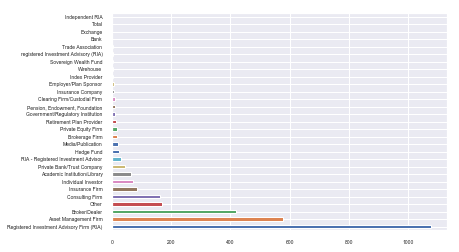

In [47]:
# Plot the same data as a (horizontal) bar plot 
ax = SAL_data.loc[:, 'Firm Type'].value_counts().plot(kind='barh',fontsize=5);

In [67]:
# firm types of conversions
SAL_conversions.loc[:, 'Firm Type'].value_counts().sort_index()

Academic Institution/Library                   7
Asset Management Firm                         95
Broker/Dealer                                 50
Brokerage Firm                                 2
Consulting Firm                               21
Employer/Plan Sponsor                          1
Hedge Fund                                     6
Index Provider                                 1
Individual Investor                            3
Insurance Company                              2
Insurance Firm                                10
Media/Publication                              1
Other                                         16
Pension, Endowment, Foundation                 3
Private Bank/Trust Company                    13
Private Equity Firm                            1
RIA - Registered Investment Advisor            6
Registered Investment Advisory Firm (RIA)    227
Retirement Plan Provider                       3
Sovereign Wealth Fund                          2
registered Investmen

In [ ]:
# investment strategy of conversions
SAL_conversions.loc[:, 'Role Type'].value_counts().sort_index()

In [ ]:
# Type 1: Advisor/Financial Planner
# Types 5, 6, 7 are household glass.
# /scrub/
SAL_data['Role Type'] = SAL_data.role_types.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

In [ ]:
# fill nulls with reasonable values 
SAL_data['TotalAssetsInMillions'].fillna(value=None, inplace=True)

# Verify there are no longer null values
SAL_data['TotalAssetsInMillions'].isnull().sum()